# Task1: Linear Regression

In [3]:
"""
1. Create ‘sales’ Dataset having 5 columns namely: ID, TV, Radio, Newspaper and Sales. (random 500 entries).
Build a linear regression model by identifying independent and target variable.
Split the variables into training and testing sets. then divide the training and testing sets into a 7:3 ratio, respectively and print them.
Build a simple linear regression model.
"""

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(42)
data = {
    'ID': list(range(1, 501)),
    'TV': np.random.uniform(10, 300, 500),
    'Radio': np.random.uniform(5, 100, 500),
    'Newspaper': np.random.uniform(5, 80, 500),
    'Sales': np.random.uniform(1, 20, 500)
}
df = pd.DataFrame(data)

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data into training and testing sets (7:3 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data for features :\n", X_train)
print("Training data for target :\n", y_train)

# Train linear regression model
model = Sequential()
model.add(Dense(1, input_shape=(X_train.shape[1],)))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.4f}")

Training data for features :
              TV      Radio  Newspaper
5     55.238411  20.448609  54.408753
116  243.064902  10.802406  11.861513
45   202.131462  39.025458  51.189739
16    98.230250  40.764020  18.543151
462  226.353015  28.308165  12.994477
..          ...        ...        ...
106  129.011048  24.601703  34.718151
270  244.714735  15.510015  57.123641
348  118.637658  52.708526  79.073717
435  213.281048  30.869196   7.248019
102  101.163235  21.815996  71.283941

[350 rows x 3 columns]
Training data for target :
 5       8.577633
116    19.888648
45     10.187367
16     13.302020
462    16.956243
         ...    
106     2.284639
270     9.729489
348    17.851573
435    16.294791
102     5.306472
Name: Sales, Length: 350, dtype: float64
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 34781.4531 - mae: 163.7298 - val_loss: 33092.6484 - val_mae: 157.9263
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 35112.4766 - mae: 165.5793 - val_loss: 32087.2539 - val_mae: 155.2758
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 36227.1641 - mae: 168.0899 - val_loss: 31112.0898 - val_mae: 152.6804
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 35800.9648 - mae: 168.4443 - val_loss: 30159.7402 - val_mae: 150.1387
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 33228.7891 - mae: 161.0920 - val_loss: 29235.4258 - val_mae: 147.6391
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31058.2930 - mae: 154.5397 - val_loss: 28337.1074 - val_mae: 145.1705
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29095.2910 - mae: 147.8459 - val_loss: 27452.0723 - val_mae: 142.6982
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 29204.0547 - mae: 147.9321 - val_loss: 26597.1621 - v

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Mean Squared Error: 6043.4521


# Task 2: Logistic Regression

In [5]:
"""
2- Create ‘User’ Dataset having 5 columns namely: User ID, Gender, Age, EstimatedSalary and Purchased.
Build a logistic regression model that can predict whether on the given parameter a person will buy a car or not.
"""

import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = {
    'UserID': range(1, 401),
    'Gender': np.random.choice(['Male', 'Female'], 400),
    'Age': np.random.randint(18, 70, 400),
    'EstimatedSalary': np.random.randint(20000, 150000, 400),
    'Purchased': np.random.choice([0, 1], 400, p=[0.6, 0.4])
}
df = pd.DataFrame(data)

# Convert Gender to numerical
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Define features and target
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = Sequential([Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6314 - loss: 33763.6484 - val_accuracy: 0.6625 - val_loss: 29365.9062
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6501 - loss: 32109.4180 - val_accuracy: 0.6625 - val_loss: 29101.8594
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5871 - loss: 37481.7109 - val_accuracy: 0.6625 - val_loss: 28838.9570
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6028 - loss: 33879.0859 - val_accuracy: 0.6625 - val_loss: 28580.4883
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6247 - loss: 31674.6309 - val_accuracy: 0.6625 - val_loss: 28322.6504
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6334 - loss: 32526.2344 - val_accuracy: 0.6625 - val_loss: 28061.5371
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6148 - loss: 33748.1250 - val_accuracy: 0.6625 - val_loss: 27800.6250
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6172 

# Task 3: linear regression model

In [ ]:
"""
3- Build a simple linear regression model for Fish Species Weight Prediction.
(download dataset https://www.kaggle.com/aungpyaeap/fish-market?select=Fish.csv )
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/sample_data/Fish.csv')

data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None


In [ ]:
print(data.describe())

            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


In [ ]:
data = data.dropna()

In [ ]:
# Convert categorical 'Species' to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Species'], drop_first=True)

In [ ]:
X = data.drop('Weight', axis=1)
y = data['Weight']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error: 7007.38


In [ ]:
r2 = r2_score(y_test, y_pred)

print("R² Score: ", r2)

R² Score: 0.95


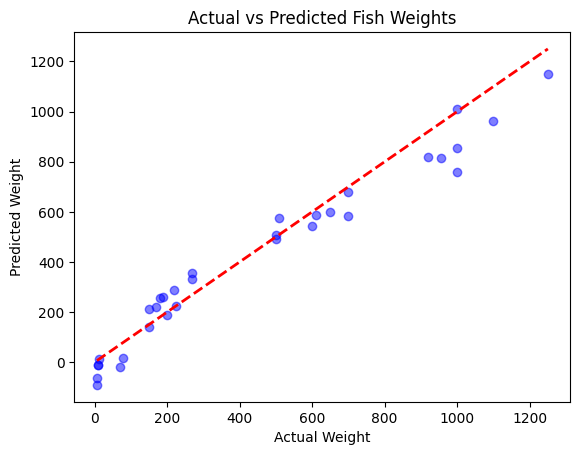

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Fish Weights')
plt.show()

In [ ]:
"""
4- Create ‘realestate’ Data set having 4 columns namely: ID,flat, houses and purchases (random 500 entries).
Build a linear regression model by identifying independent and target variable.
Split the variables into training and testing sets and print them.
Build a simple linear regression model for predicting purchases.
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(42)
n = 500
data = {
    'ID': range(1, n+1),
    'flat': np.random.randint(50, 200, n),
    'houses': np.random.randint(1, 10, n),
    'purchases': np.random.randint(100000, 1000000, n)
}
realestate = pd.DataFrame(data)

X = realestate[['flat', 'houses']]
y = realestate['purchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

Training set shape: (400, 2) (400,)
Testing set shape: (100, 2) (100,)


LinearRegression()

In [ ]:
print("\nModel Coefficients:")

print("Flat coefficient:", model.coef_[0])
print("Houses coefficient:", model.coef_[1])
print("Intercept:", model.intercept_) #biase


Model Coefficients:
Flat coefficient: 117.2935739504505
Houses coefficient: -8808.621807754878
Intercept: 588877.2670451277
